<a href="https://colab.research.google.com/github/tarunteju2/Bank-Marketing/blob/main/Bank_Marketing_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Marketing Analysis**


In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,12)

In [ ]:
plt.style.use('seaborn')

#**Loading data**

In [ ]:
from google.colab import files
uploaded=files.upload

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/bank+marketing/bank-additional/bank-additional/bank-additional-full.csv',sep=';')

In [ ]:
data.shape

(41188, 21)

There are 41188 rows and 21 columns

In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 



1.   There are 21 features
2.   y is the output

3.   Contains both numerical data and categorical data









In [ ]:
data=data.drop('duration',axis=1)

In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print("dataset shape:",data.shape)

dataset shape: (41188, 20)


In [ ]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# **Histogram plot**

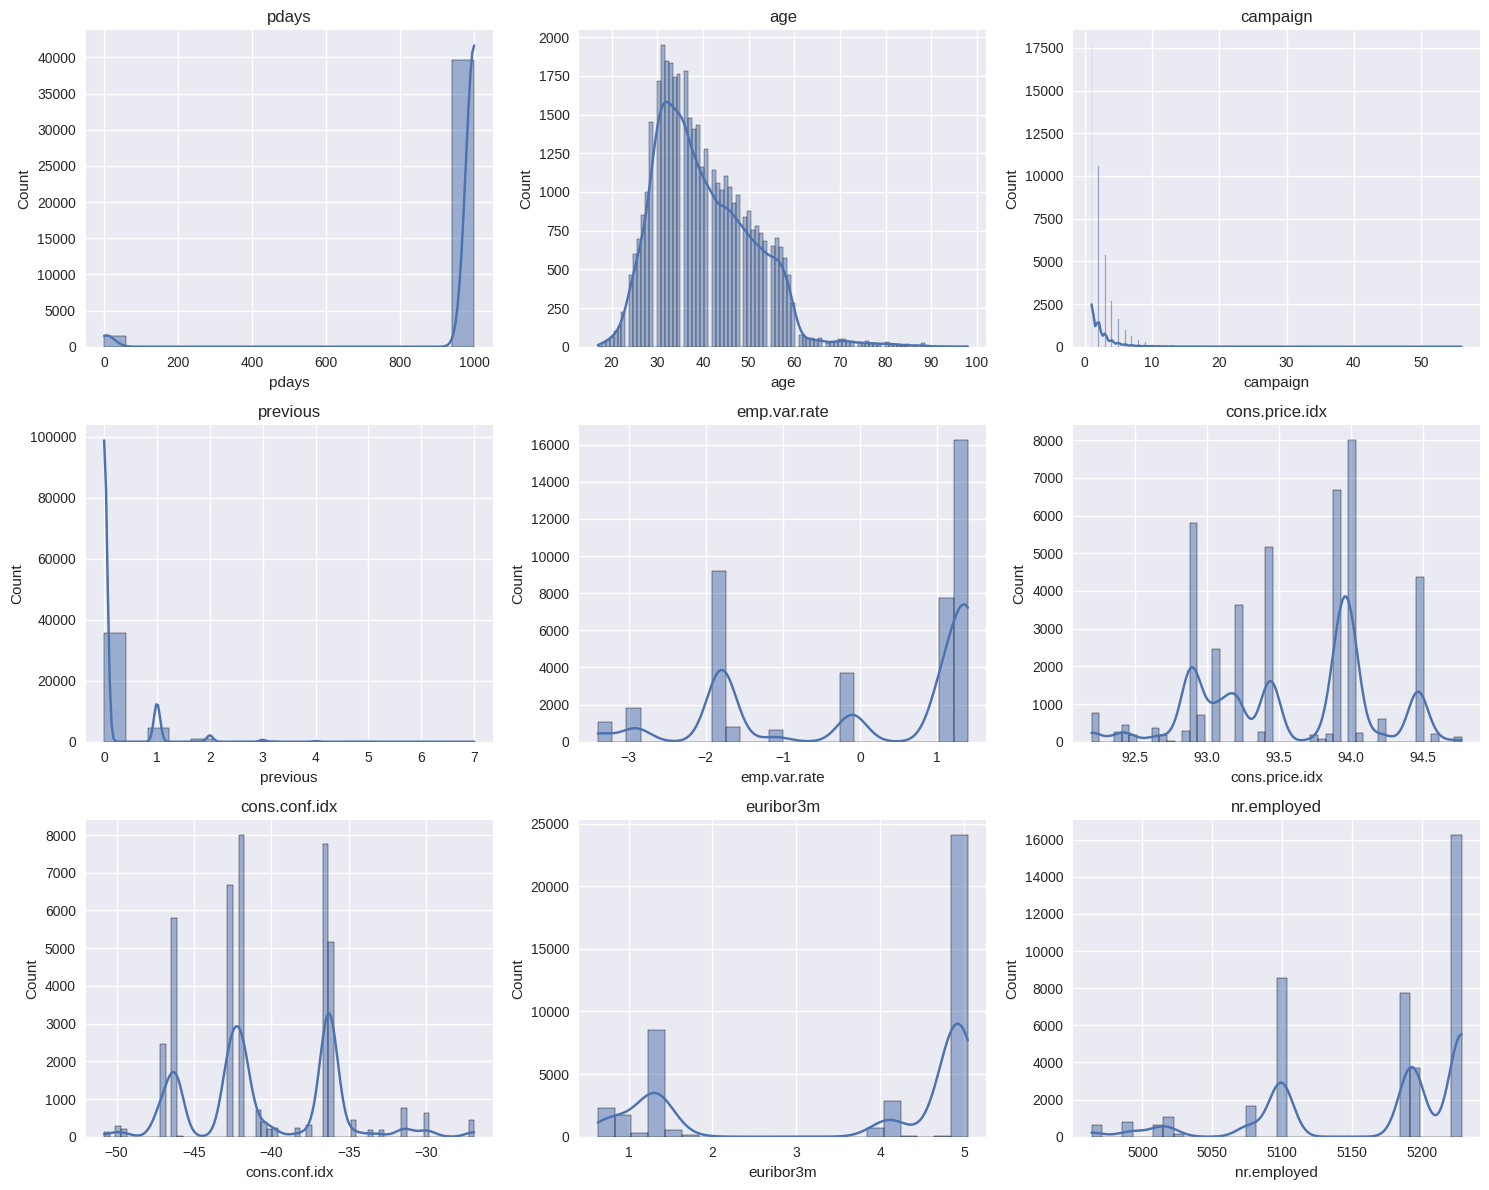

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of features for which you want to plot distribution plots
features = ['pdays', 'age', 'campaign', 'previous', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot distribution plots for each feature
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(feature)  # Set subplot title

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


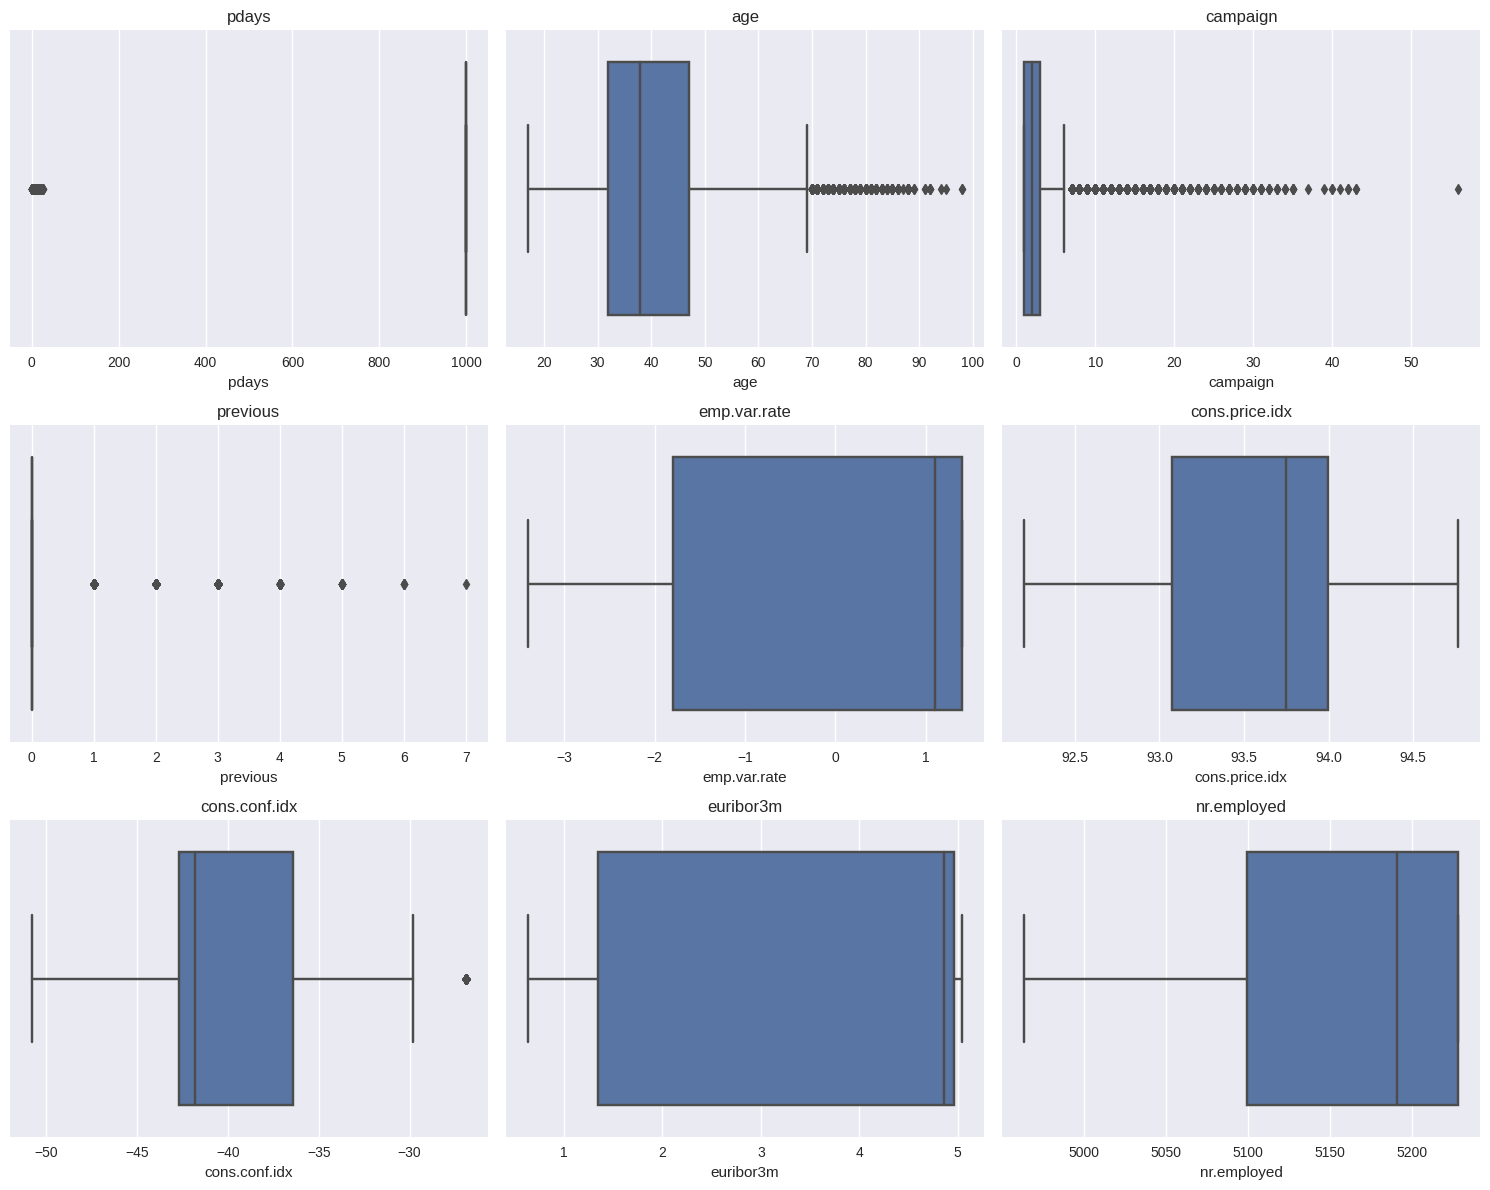

In [ ]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of features for which you want to plot box plots
features = ['pdays', 'age', 'campaign', 'previous', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title(feature)  # Set subplot title

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

no     36548
yes     4640
Name: y, dtype: int64


Text(0.5, 1.0, 'Bank Deposit')

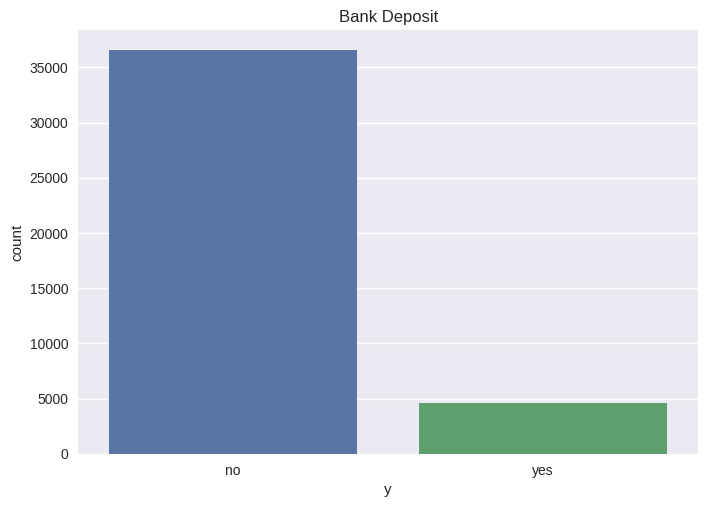

In [ ]:
print(data.y.value_counts())
axes1=sns.countplot(x='y',data=data)
plt.title('Bank Deposit')

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#Observation


1.   20 Features
2.   age,job,marital,education,default, housing,loan,
       contact,month,day_of_week,campaign, pdays,previous,
       poutcome,emp.var.rate,cons.price.idx, cons.conf.idx,
       euribor3m,nr.employed,y



In [ ]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

#Checking missing values

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values

#Correlation Plot

<Axes: >

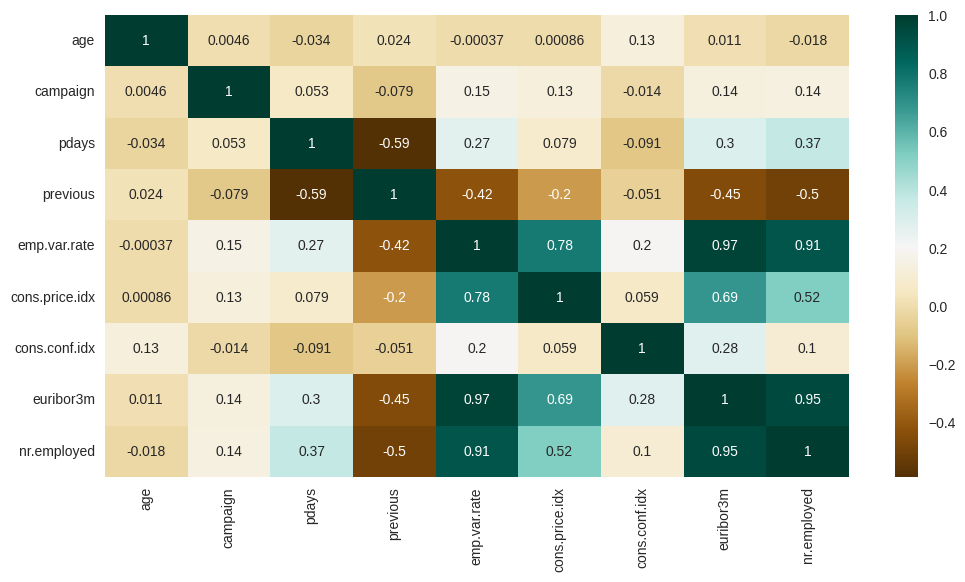

In [ ]:
plt.figure(figsize=(12,6))
b=data.corr()
sns.heatmap(b,cmap="BrBG",annot=True)

#Standardization of data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data_num=data.copy()

In [ ]:
print(data_num.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
# Check columns before dropping
print(data_num.columns)

# Drop specified columns
cols_to_drop = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_num = data_num.drop(cols_to_drop, axis=1)

# Check columns after dropping
print(data_num.columns)


scaler = StandardScaler()
n_cols = ['age', 'pdays', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data_num[n_cols] = scaler.fit_transform(data_num[n_cols])
data_num.head()


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no


#One hot key encoding

In [ ]:
import pandas as pd

# Assuming 'data' is your original DataFrame
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

# Separate the target variable 'y' and assign it to 'bank_targs'
bank_targs = data_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)
data_encoded = data_encoded.drop(['y'], axis=1)

# Display the modified DataFrame and the separated target variable 'bank_targs'
print("Modified DataFrame:")
print(data_encoded.head(10))

print("\nSeparated Target Variable 'bank_targs':")
print(bank_targs.head(10))


Modified DataFrame:
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   
5   45         1    999         0           1.1          93.994   
6   59         1    999         0           1.1          93.994   
7   41         1    999         0           1.1          93.994   
8   24         1    999         0           1.1          93.994   
9   25         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0          -36.4      4.857       5191.0                0  ...          1   
1          -36.4      4.857       5191.0                0  ...          1   
2          

#Handling Imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the resampling strategy
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# Create the pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(data_encoded, bank_targs)


#Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the classifier with class weights
clf = RandomForestClassifier(class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4584
           1       0.89      0.86      0.87      3640

    accuracy                           0.89      8224
   macro avg       0.89      0.89      0.89      8224
weighted avg       0.89      0.89      0.89      8224

Accuracy: 0.8901994163424124


#HyperParameter Tuning for RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for a more efficient search
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Make predictions with the best model
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 58}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4584
           1       0.89      0.83      0.86      3640

    accuracy                           0.88      8224
   macro avg       0.88      0.88      0.88      8224
weighted avg       0.88      0.88      0.88      8224

Accuracy: 0.8801070038910506


Hyperparameter tuning visualization

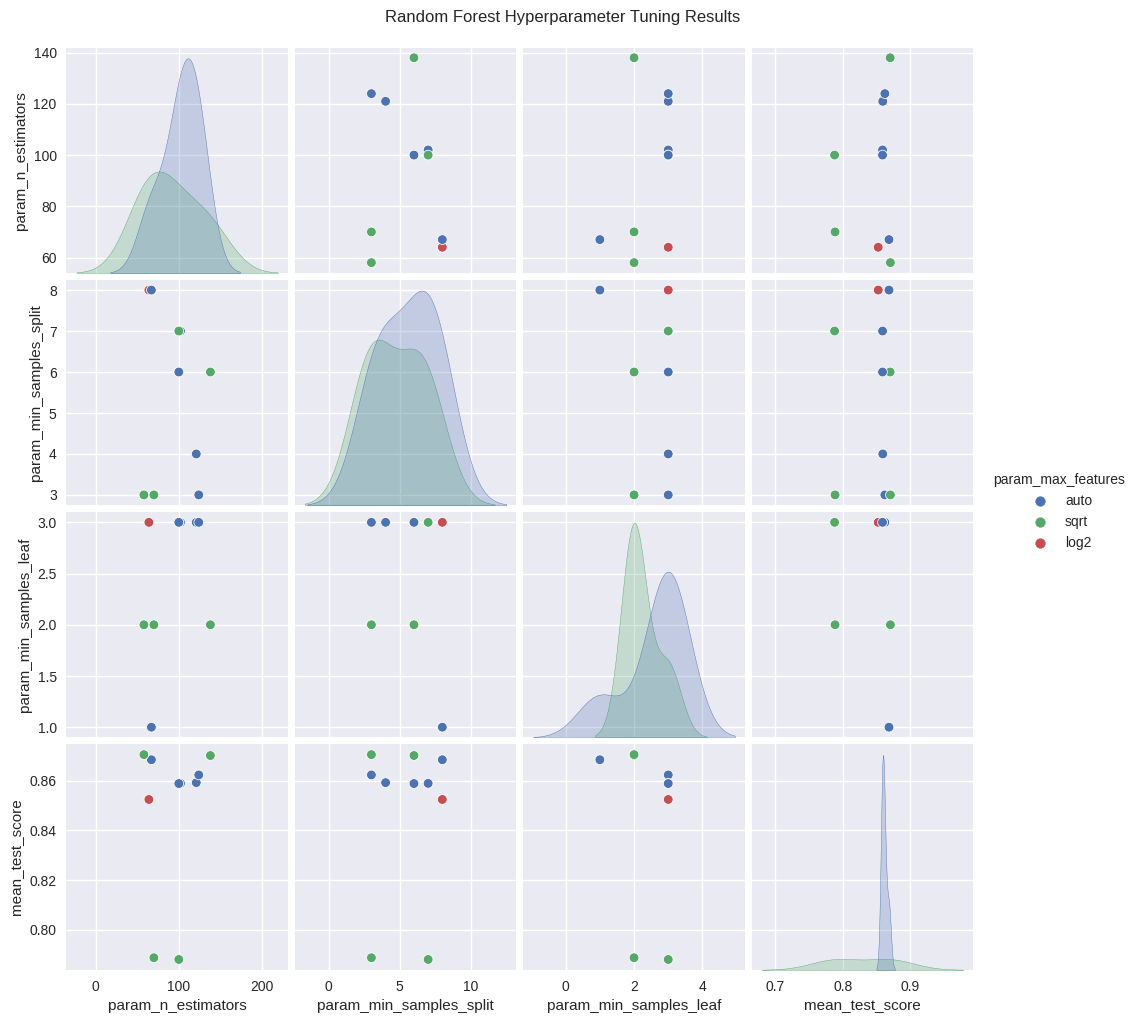

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Extract the hyperparameter values and corresponding performance metrics
results_df = pd.DataFrame(random_search.cv_results_)

# Select relevant columns for visualization
cols_of_interest = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']
results_df = results_df[cols_of_interest]

# Plot the results using a pairplot for pairwise relationships
sns.pairplot(results_df, hue='param_max_features', diag_kind='kde')
plt.suptitle("Random Forest Hyperparameter Tuning Results", y=1.02)
plt.show()


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Print accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4584
           1       0.81      0.85      0.83      3640

    accuracy                           0.84      8224
   macro avg       0.84      0.84      0.84      8224
weighted avg       0.85      0.84      0.84      8224

Accuracy: 0.8441147859922179


#XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4584
           1       0.90      0.83      0.86      3640

    accuracy                           0.88      8224
   macro avg       0.89      0.88      0.88      8224
weighted avg       0.88      0.88      0.88      8224

Accuracy: 0.8837548638132295


Hyperparameter Tuning for XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions with the best model
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4584
           1       0.90      0.84      0.87      3640

    accuracy                           0.89      8224
   macro avg       0.89      0.88      0.89      8224
weighted avg       0.89      0.89      0.89      8224

Accuracy: 0.8889834630350194


#Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_nn_proba = model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Print accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)


Epoch 1/10
823/823 [==============================] - 10s 8ms/step - loss: 0.4023 - accuracy: 0.8243 - val_loss: 0.3715 - val_accuracy: 0.8460
Epoch 2/10
823/823 [==============================] - 4s 5ms/step - loss: 0.3611 - accuracy: 0.8490 - val_loss: 0.3670 - val_accuracy: 0.8454
Epoch 3/10
823/823 [==============================] - 5s 6ms/step - loss: 0.3496 - accuracy: 0.8530 - val_loss: 0.3582 - val_accuracy: 0.8482
Epoch 4/10
823/823 [==============================] - 5s 6ms/step - loss: 0.3432 - accuracy: 0.8563 - val_loss: 0.3577 - val_accuracy: 0.8501
Epoch 5/10
823/823 [==============================] - 5s 6ms/step - loss: 0.3371 - accuracy: 0.8586 - val_loss: 0.3545 - val_accuracy: 0.8523
Epoch 6/10
823/823 [==============================] - 4s 5ms/step - loss: 0.3321 - accuracy: 0.8612 - val_loss: 0.3562 - val_accuracy: 0.8506
Epoch 7/10
823/823 [==============================] - 5s 6ms/step - loss: 0.3295 - accuracy: 0.8637 - val_loss: 0.3512 - val_accuracy: 0.8485
Epoch

Hyperparameter Tuning for Neural Network

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model as a function
def create_model(hidden_layer_size=32, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters for manual tuning
best_hyperparameters = {'hidden_layer_size': 32, 'activation': 'relu'}

# Create the model with the best hyperparameters
best_nn_model = create_model(**best_hyperparameters)

# Fit the model
best_nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model on the test set
y_pred_nn_proba = best_nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Print accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)


257/257 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4584
           1       0.89      0.78      0.83      3640

    accuracy                           0.86      8224
   macro avg       0.87      0.85      0.86      8224
weighted avg       0.86      0.86      0.86      8224

Accuracy: 0.8605301556420234


#Plotting ROC curve & precision recall curve

257/257 [==============================] - 0s 2ms/step


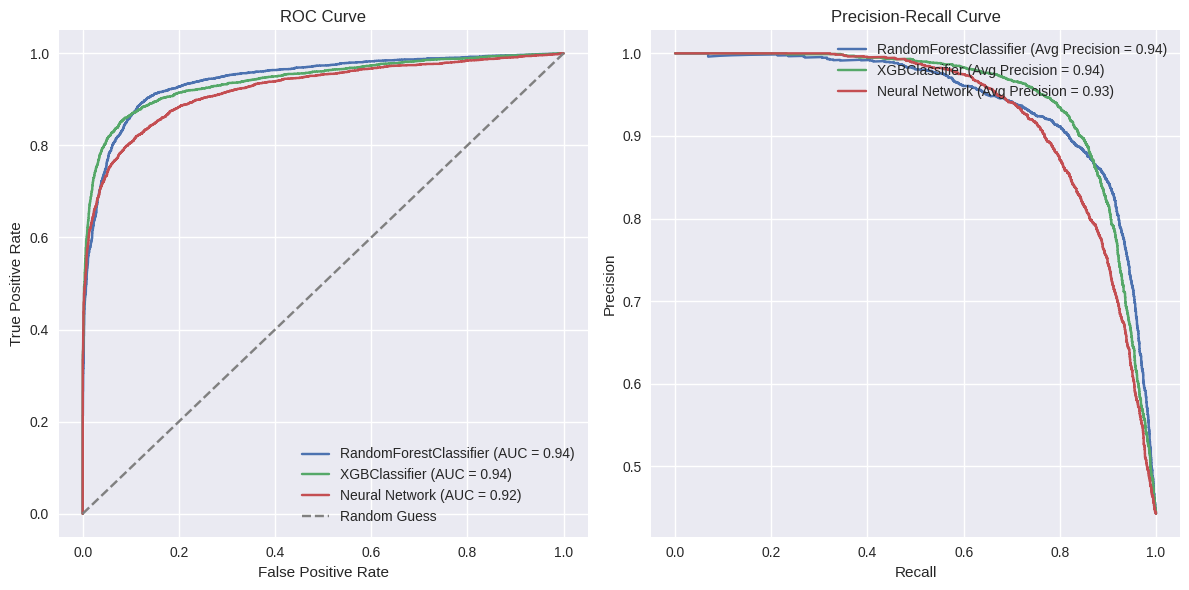

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

models = [best_rf_model, best_xgb_model, best_nn_model]
predictions = [best_rf_model.predict_proba(X_test)[:, 1],
               best_xgb_model.predict_proba(X_test)[:, 1],
               best_nn_model.predict(X_test_scaled).ravel()]

# Plot ROC and Precision-Recall curves
plt.figure(figsize=(12, 6))

# Plot ROC curves
plt.subplot(1, 2, 1)
for i, model in enumerate(models):
    if model == best_nn_model:
        label = 'Neural Network'
    else:
        label = f'{model.__class__.__name__}'

    fpr, tpr, thresholds = roc_curve(y_test, predictions[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Precision-Recall curves
plt.subplot(1, 2, 2)
for i, model in enumerate(models):
    if model == best_nn_model:
        label = 'Neural Network'
    else:
        label = f'{model.__class__.__name__}'

    precision, recall, _ = precision_recall_curve(y_test, predictions[i])
    avg_precision = average_precision_score(y_test, predictions[i])
    plt.plot(recall, precision, label=f'{label} (Avg Precision = {avg_precision:.2f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.grid(True)


plt.tight_layout()
plt.show()


#Calibaration curve

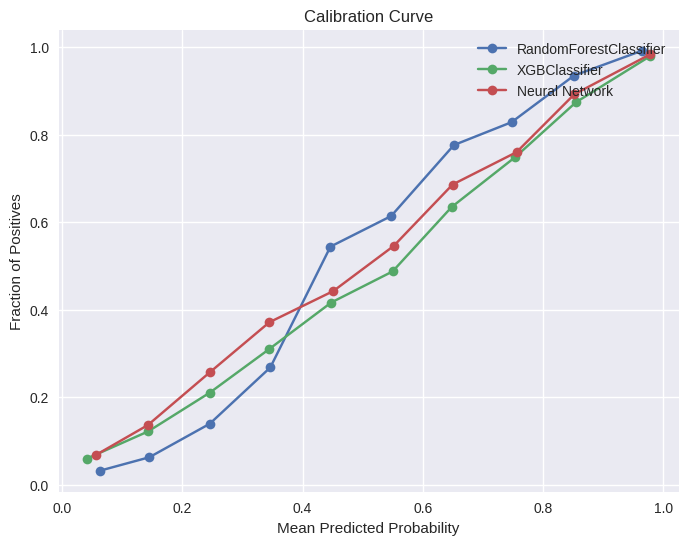

In [ ]:
from sklearn.calibration import calibration_curve

# Plot calibration curve for each model
plt.figure(figsize=(8, 6))
for i, model in enumerate(models):
    if model.__class__.__name__ == 'Sequential':
        label = 'Neural Network'
    else:
        label = f'{model.__class__.__name__}'

    prob_true, prob_pred = calibration_curve(y_test, predictions[i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'{label}')

plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#F1 Score Vs Threshold plot

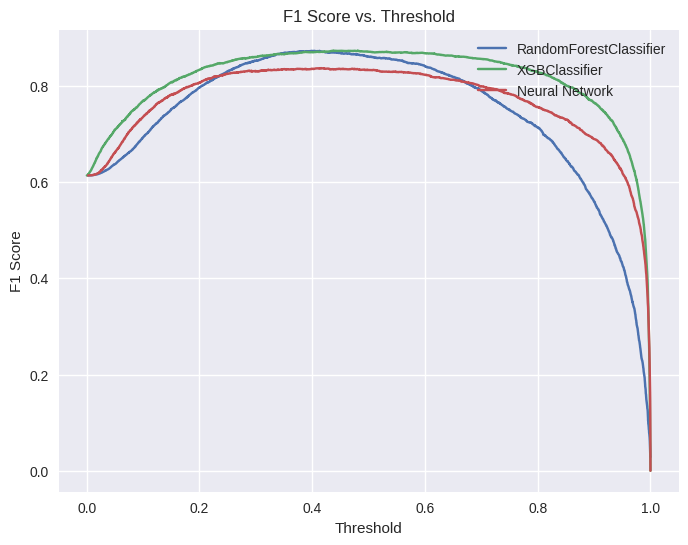

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for different thresholds
plt.figure(figsize=(8, 6))
for i, model in enumerate(models):
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[i])
    f1 = 2 * (precision * recall) / (precision + recall)

    if model.__class__.__name__ == 'Sequential':
        label = 'Neural Network'
    else:
        label = f'{model.__class__.__name__}'

    plt.plot(thresholds, f1[:-1], label=label)

plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#Confusion matrix plots

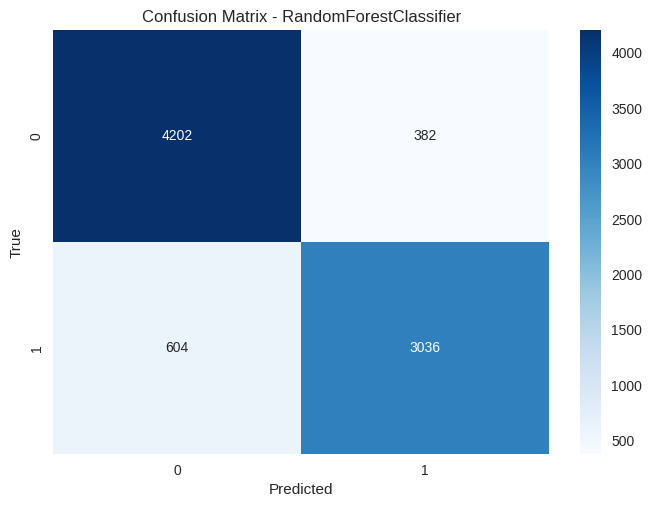

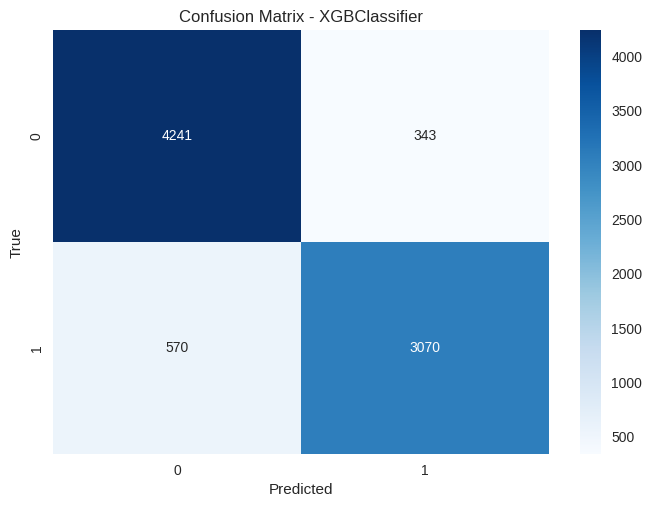

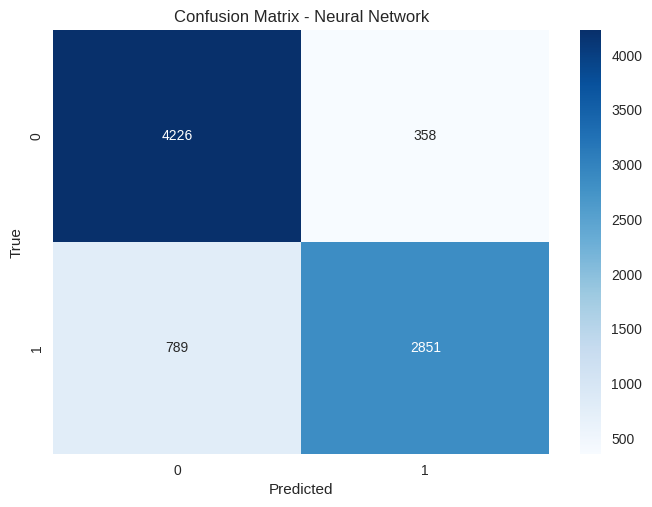

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for each model
for i, model in enumerate(models):
    if model.__class__.__name__ == 'Sequential':
        label = 'Neural Network'
    else:
        label = f'{model.__class__.__name__}'

    cm = confusion_matrix(y_test, predictions[i].round())
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix - {label}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


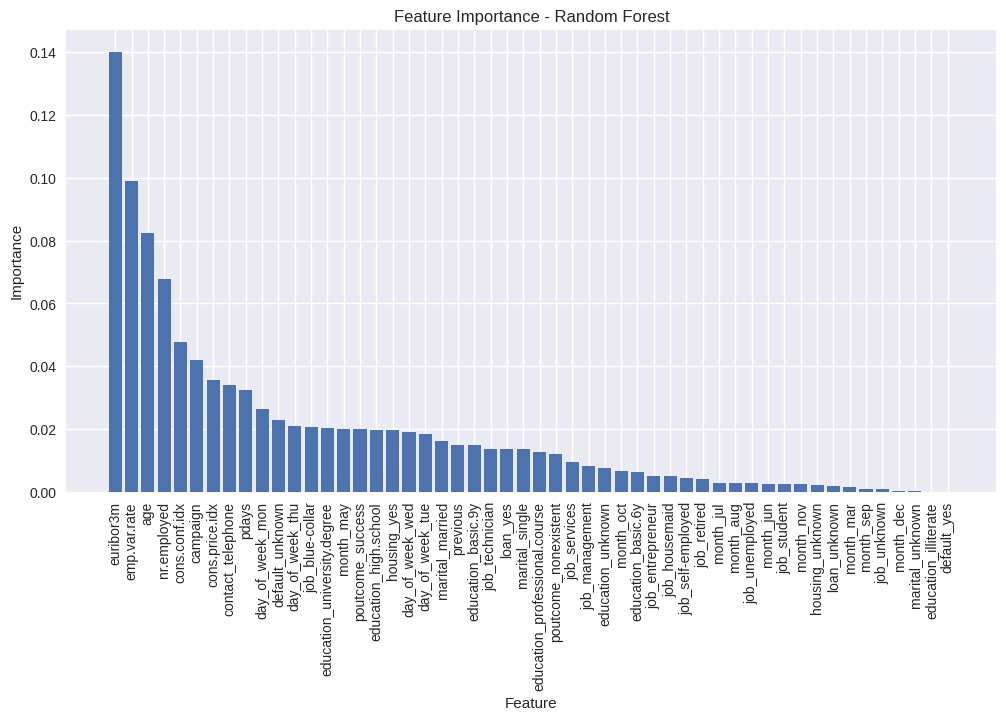

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_rf_model' or 'best_xgb_model' is your trained model

# Get feature importances
if hasattr(best_rf_model, 'feature_importances_'):
    feature_importances = best_rf_model.feature_importances_
    model_name = 'Random Forest'
elif hasattr(best_xgb_model, 'feature_importances_'):
    feature_importances = best_xgb_model.feature_importances_
    model_name = 'XGBoost'
else:
    raise ValueError("Model doesn't have feature importances attribute.")

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Feature Importance - {model_name}')
plt.show()


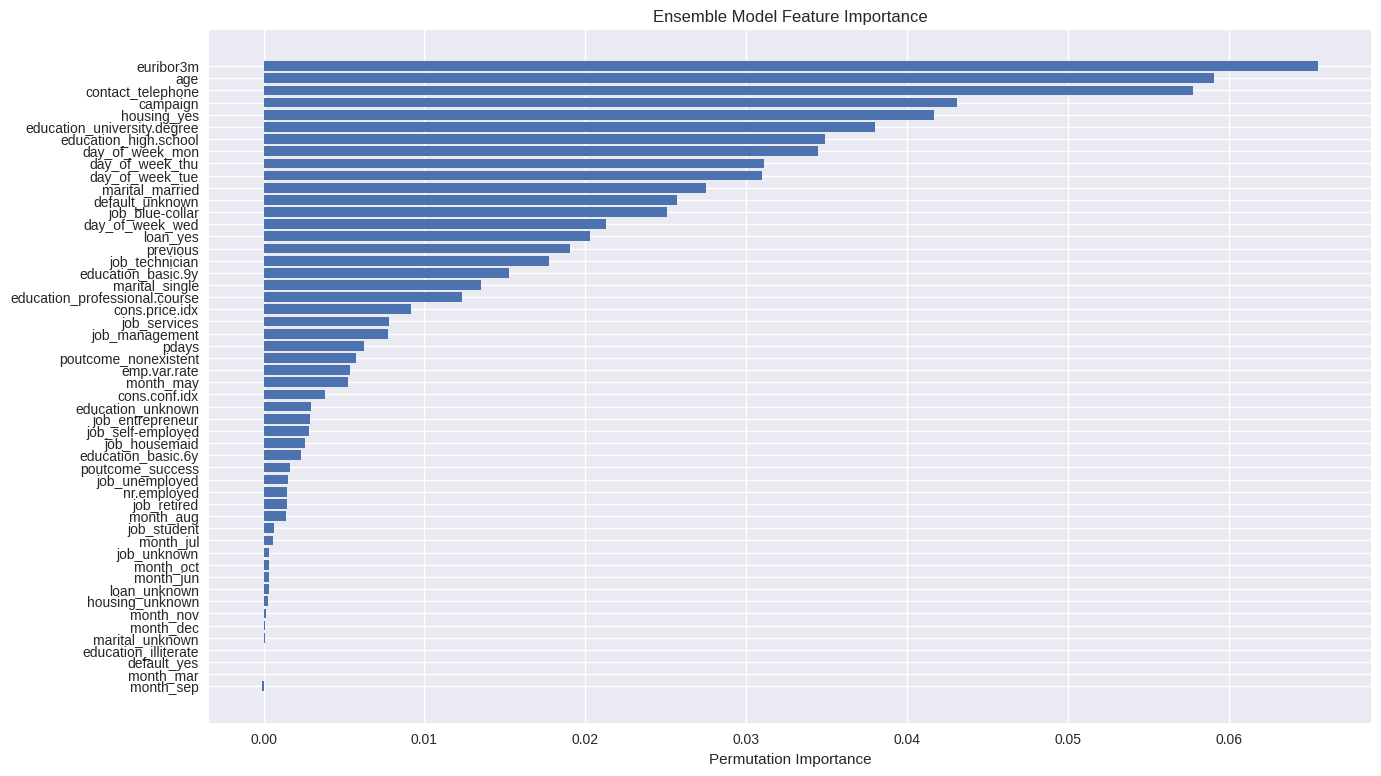

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

ensemble_model = RandomForestClassifier(random_state=42)

ensemble_model.fit(X_resampled, y_resampled)

result = permutation_importance(ensemble_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

# Sort features by importance
sorted_idx = feature_importance.argsort()

# Plot feature importance
plt.figure(figsize=(15, 9))
plt.barh(range(X_test.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Ensemble Model Feature Importance')
plt.show()
